In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='SimHei')

# 2019全國環境輻射偵測

In [2]:
df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=6095&md5_url=ddbe148a00d339f228fc8e4337968057')
df.head()

,監測站,監測站(英文),監測值(微西弗/時),時間,GPS經度,GPS緯度
0,榮湖淨水廠,RONGHU,0.034,2019-01-03 09:55,118.408860,24.488347
1,磺潭,HWANGTAN,0.064,2019-01-03 10:00,121.647000,25.199000
2,彭佳嶼,PENGCHIAYU,0.058,2019-01-03 10:00,122.081985,25.628234
3,石門水庫,SHIMEN_RES,0.044,2019-01-03 10:00,121.240000,24.811000
4,清華大學,NTHU,0.030,2019-01-03 09:55,120.991000,24.791000


# 畫出監測站的分布

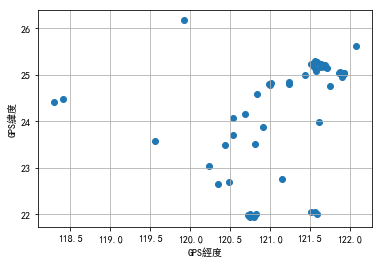

In [3]:
plt.xlabel('GPS經度')
plt.ylabel('GPS緯度')
plt.scatter(x=df['GPS經度'], y=df['GPS緯度'])
plt.grid(True)
plt.show()

由上圖，北部區域的輻射偵測站最多

# 比較各觀測站輻射值

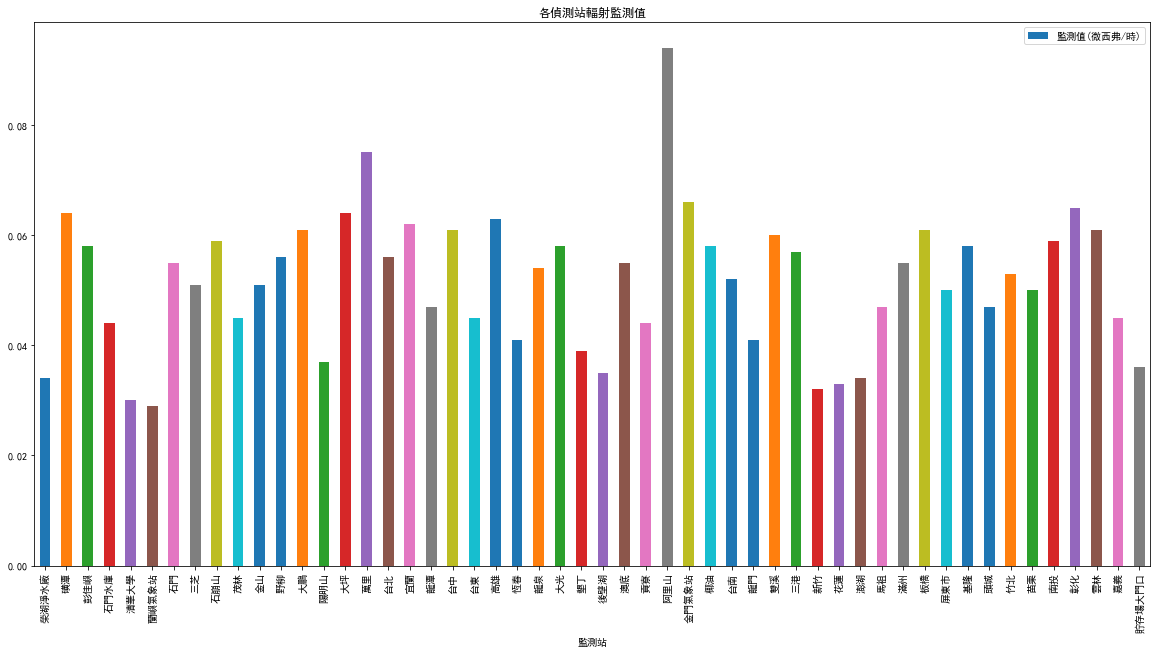

In [4]:
df.plot(x='監測站', y= '監測值(微西弗/時)', kind='bar', title = '各偵測站輻射監測值', figsize=(20,10))

由上圖可看出，「金門氣象站」所偵測到的輻射值最高

# 分別計算台灣各地區的輻射平均

In [5]:
df1=df.sort_values(by = ['GPS緯度'],ascending=False)
df1.head()

,監測站,監測站(英文),監測值(微西弗/時),時間,GPS經度,GPS緯度
39,馬祖,MATZU,0.047,2019-01-03 10:00,119.923300,26.169300
2,彭佳嶼,PENGCHIAYU,0.058,2019-01-03 10:00,122.081985,25.628234
6,石門,SHIHMAN,0.055,2019-01-03 10:00,121.562988,25.291137
9,茂林,MAOLIN,0.045,2019-01-03 10:00,121.590904,25.270145
8,石崩山,SHIHBENGSHAN,0.059,2019-01-03 10:00,121.565780,25.263563


北台灣

In [6]:
#北台灣:石門 - 新竹
df_North_Taiwan=df1[2:28]
#北台灣各監測站平均值
x1=np.mean(df_North_Taiwan['監測值(微西弗/時)'])
x1

0.052500000000000005

中台灣

In [7]:
#中台灣 苗栗-苗栗、臺中、彰化、南投及雲林 
Middle_Taiwan_df= df[(df['監測站']== '苗栗') | (df['監測站']== '台中') | (df['監測站']== '彰化') | (df['監測站']== '南投') | 
        (df['監測站']== '雲林') ]
x2=np.mean(Middle_Taiwan_df['監測值(微西弗/時)'])
x2

0.05920000000000001

南台灣

In [8]:
#南臺灣: 嘉義縣、嘉義市、臺南市、高雄市、屏東縣及澎湖縣
p=['澎湖','阿里山','嘉義','台南','屏東市','高雄','恆春','龍泉','大光','墾丁','後壁湖']
South_Taiwan_df = pd.DataFrame(columns=['監測站','監測值(微西弗/時)'])
for i in range (0,11):
    s_df = df[df['監測站'] == p[i]]
    s_df.reset_index(drop=True, inplace=True)
    South_Taiwan_df.loc[i]=[[s_df['監測站']], np.float(s_df['監測值(微西弗/時)'])]    
x3=np.mean(South_Taiwan_df['監測值(微西弗/時)'])
x3

0.05136363636363636

東台灣

In [9]:
#東台灣:花蓮縣及臺東縣
East_Taiwan_df = df[(df['監測站']== '花蓮') | (df['監測站']== '台東')]
x4=np.mean(East_Taiwan_df['監測值(微西弗/時)'])
x4

0.039

離島

In [10]:
#離島:馬祖,彭佳嶼,澎湖,金門氣象站,榮湖淨水場,椰油,蘭嶼氣象站,貯存場大門口
d=['馬祖','彭佳嶼','澎湖','金門氣象站','榮湖淨水廠','椰油','蘭嶼氣象站','貯存場大門口']
Island_Taiwan_df = pd.DataFrame(columns=['監測站','監測值(微西弗/時)'])
for i in range (0,8):
    d_df = df[df['監測站'] == d[i]]
    d_df.reset_index(drop=True, inplace=True)
    Island_Taiwan_df.loc[i]=[[d_df['監測站']], np.float64(d_df['監測值(微西弗/時)'])]    
x5=np.mean(Island_Taiwan_df['監測值(微西弗/時)'])
x5

0.04525000000000001

# 比較北台灣、中台灣、南台灣、東台灣和離島地區的輻射值

In [11]:
地區= ['北台灣','中台灣','南台灣','東台灣','離島地區']
平均監測值=[x1, x2, x3, x4, x5]
Total_dict={"地區":地區, "平均監測值":平均監測值}
Total_df= pd.DataFrame(Total_dict)
Total_df

,地區,平均監測值
0,北台灣,0.052500
1,中台灣,0.059200
2,南台灣,0.051364
3,東台灣,0.039000
4,離島地區,0.045250


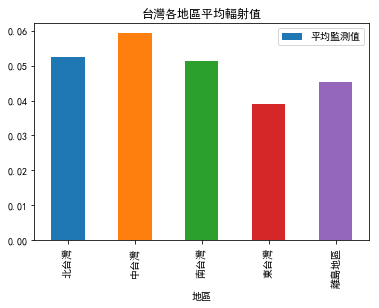

In [12]:
Total_df.plot(x= '地區', y='平均監測值', kind='bar', title='台灣各地區平均輻射值')

由上圖可知，中台灣的輻射值比較多